### Aufgabe 1

0.01
Anzahl Messpunkte:  1501


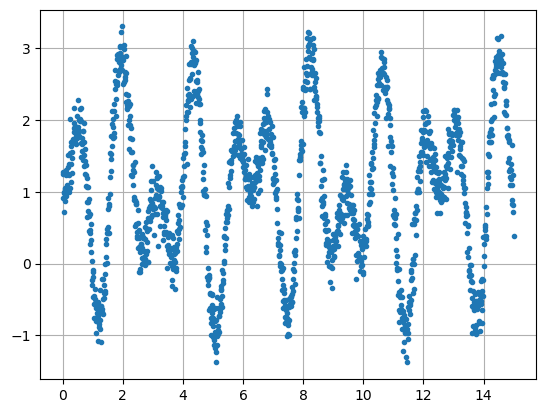

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

data = np.genfromtxt('data.txt')

ts = data[1,0]-data[0,0]
print(ts)
print("Anzahl Messpunkte: ",len(data[:,1]))

plt.plot(data[:,0],data[:,1],'.')
plt.grid()



2. Wie man sieht ist die höchste Frequenz etwa eine Periode von 1.5s was einer Frequenz von 0.66Hz entspricht, die Grundfrequenz beträgt wohl etwas um die 0.2Hz. Die Samplingzeit beträgt 0.01s, die Abtastrate beträgt also 100Hz.

3. Die Systemmatrix ist eine (1 + 2n) * 1501 Matrix. Weil man 1 + 2n unbekannte in der gegebenen Funktion hat und 1501 Messwerte gegeben sind die jeweils im Vektor b einen Eintrag erhalten. Damit die Dimensionen stimmen muss die Matrix A also eine (1 + 2n) * 1501 Matrix sein.

4. Die Systemmatrix hat folgende Eigenschaften: die Erste Spalte besteht nur aus den Vorfaktoren von $a_0$, dieser ist konstant und gegeben als $1/2$. Die folgenden Spalten bestehen jeweils abwechselnd aus den Vorfaktoren von $a_k$ bzw. $b_k$. Diese sind definiert als $cos(\omega k t)$ bzw. $sin(\omega k t)$. Die gesuchte Matrix ist also die folgende:
 

In [3]:
n = 5
w=1.0
t = data[:,0]

A = np.zeros([len(t),1+2*n],dtype=float)
A[:,0] = 0.5
for k in range(1,n+1):
    A[:,1+(k-1)*2] = np.cos(w*k*t)
    A[:,2+(k-1)*2] = np.sin(w*k*t)

5. Die Normalengleichung hat die Dimension 11 dh. es sind 11 Gleichungen die gelöst werden müssen.

$$A^T * A * y = A^T * b$$

[ 1.99642414e+00  1.59601756e-03  1.03877179e-01 -4.05814355e-03
  8.38722258e-03  9.96411376e-01  6.22509996e-03  1.41911146e-02
  5.61189950e-03 -1.00568510e+00 -6.32409912e-03]
[5.98026895 5.97846276 5.97118059 ... 0.84560719 0.86674861 0.88671643]


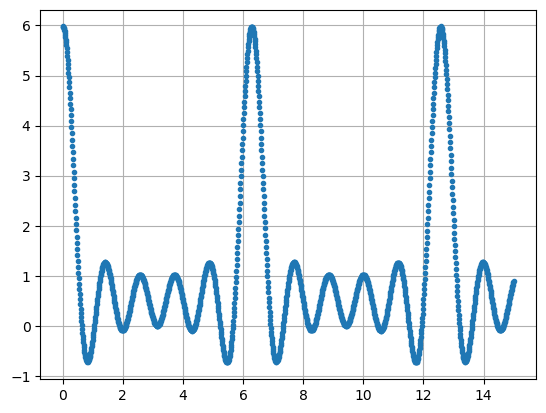

In [10]:
b = data[:,1]
Asolve = A.T@A
bsolve = A.T@b



L = sp.linalg.cholesky(Asolve,lower=True)
U = sp.linalg.cholesky(Asolve,lower=False)
ysolve = sp.linalg.solve_triangular(L,bsolve,unit_diagonal=False,lower=True)
x = sp.linalg.solve_triangular(U,ysolve,unit_diagonal=False)

print(x)

t = np.array([])

def fn(t):
    tk = np.zeros([len(t),n])
    for i in range(n):
        tk[:,i] = t*(i+1)
    val = 0.5*x[0] + np.sum(np.cos(w*tk)*x[k] + np.sin(w*tk)*x[k+1],axis = 1)
    return val

print(fn(t))

plt.plot(data[:,0],fn(t),'.')
plt.grid()


In [7]:
##Test sycipy solver

ATest = np.array([[1,1,1],[1,2,1],[1,1,2]])
bTest = np.array([4,5,6])

LTest = sp.linalg.cholesky(ATest,lower=True)
UTest = sp.linalg.cholesky(ATest,lower=False)
ytest = sp.linalg.solve_triangular(LTest,bTest, lower=True)
xtest = sp.linalg.solve_triangular(UTest,ytest)
print(xtest)

[1. 1. 2.]
